# Importing all the **libs**

In [0]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DateType, BooleanType, DecimalType
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.window import Window



#create session
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()

# CREATING and  READING the schemas for the dataset ensures proper organization, separation of raw and processed data, 
and easier governance. A schema acts as a logical container inside a catalog, 
helping us manage tables, views, and permissions in a structured way.


In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),

    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),

    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),

    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),

    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),

    StructField("out_type", StringType(), True),

    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),

    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),

    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),

    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),

    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),

    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [0]:
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header", "true").load("/Volumes/datasets_for_projects/ipl_raw/ipl_datset_vol1/IPL_Dataset_project/Ball_By_Ball.csv")

In [0]:
match_schema = StructType([

    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),

    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),

    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),

    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),

    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),

    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),

    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),

    StructField("country_id", IntegerType(), True)
])

In [0]:
match_df = spark.read \
    .schema(match_schema) \
    .format("csv") \
    .option("header", "true") \
    .load("/Volumes/datasets_for_projects/ipl_raw/ipl_datset_vol1/IPL_Dataset_project/Match.csv")

In [0]:
player_schema = StructType([

    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),

    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),

    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),

    StructField("country_name", StringType(), True)
])

In [0]:
player_df = spark.read \
    .schema(player_schema) \
    .format("csv") \
    .option("header", "true") \
    .load("/Volumes/datasets_for_projects/ipl_raw/ipl_datset_vol1/IPL_Dataset_project/Player.csv")

In [0]:
player_match_schema = StructType([

    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(18, 0), True),

    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),

    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),

    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),

    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),

    StructField("season_year", IntegerType(), True),

    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),

    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),

    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),

    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

In [0]:
player_match_df = spark.read \
    .schema(player_match_schema) \
    .format("csv") \
    .option("header", "true") \
    .load("/Volumes/datasets_for_projects/ipl_raw/ipl_datset_vol1/IPL_Dataset_project/Player_match.csv")


In [0]:
team_schema = StructType([

    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)

])

In [0]:
team_df = spark.read \
    .schema(team_schema) \
    .format("csv") \
    .option("header", "true") \
    .load("/Volumes/datasets_for_projects/ipl_raw/ipl_datset_vol1/IPL_Dataset_project/Team.csv")


## Displaying the schema

In [0]:
ball_by_ball_df.show(5)


+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+-----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out|  lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_sk|fielder_match_s

In [0]:
match_df.show(5)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      NULL|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    field|    runs|      Result|BB McCullum|       140|         1|
|       1|  335988|     Kings XI Punjab| Chennai

In [0]:
player_df.show(5)

+---------+---------+---------------+----+--------------+------------------+------------+
|player_sk|player_id|    player_name| dob|  batting_hand|     bowling_skill|country_name|
+---------+---------+---------------+----+--------------+------------------+------------+
|        0|        1|     SC Ganguly|NULL| Left-hand bat|  Right-arm medium|       India|
|        1|        2|    BB McCullum|NULL|Right-hand bat|  Right-arm medium| New Zealand|
|        2|        3|     RT Ponting|NULL|Right-hand bat|  Right-arm medium|   Australia|
|        3|        4|      DJ Hussey|NULL|Right-hand bat|Right-arm offbreak|   Australia|
|        4|        5|Mohammad Hafeez|NULL|Right-hand bat|Right-arm offbreak|    Pakistan|
+---------+---------+---------------+----+--------------+------------------+------------+
only showing top 5 rows


In [0]:
player_match_df.show(5)

+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|
+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+
|          12694|    3359

In [0]:
team_df.show(5)

+-------+-------+--------------------+
|team_sk|team_id|           team_name|
+-------+-------+--------------------+
|      0|      1|Kolkata Knight Ri...|
|      1|      2|Royal Challengers...|
|      2|      3| Chennai Super Kings|
|      3|      4|     Kings XI Punjab|
|      4|      5|    Rajasthan Royals|
+-------+-------+--------------------+
only showing top 5 rows


# **TRANSFORMATION on BALL_BY_BALL Dataset**
Transformation is based on BUSINESS logics and this is how we filter ot the data accoding to the downstream need

Filter to include only vaild deliveries(excluding extra like wides no balls for specific analysis)

In [0]:
ball_by_ball_df = ball_by_ball_df.filter((col("wides") == 0) & (col("noballs") == 0))


aggregation calculation the total and average runs in each maych and inning 


In [0]:
total_and_avg_runs = ball_by_ball_df.groupBy("match_id", "innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("avg_runs")
)

Window Function : Calculating running total of runs in each match for each over


In [0]:
windowSpec = Window.partitionBy(
    "match_id", "innings_no"
).orderBy(
    desc("over_id")
)

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum(col("runs_scored")).over(windowSpec)
)


Condtional Colums: Flag for high impact balls (either a wicket or more than 6 runs including extras)

In [0]:
ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when(
        (col("runs_scored") + col("extra_runs") > 6) |
        (col("bowler_wicket")),
        True
    ).otherwise(False)
)


In [0]:
ball_by_ball_df.show()

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+-----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out|  lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_s

# **NOW ON MATCH DATSET**

In [0]:
from pyspark.sql.functions import year, month, dayofmonth, when

# Extracting year, month, and day from the match date for more detailed time-based analysis
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

# High margin win: categorizing win margins into 'high', 'medium', and 'low'
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin") >= 100, "High")
    .when((col("win_margin") >= 50) & (col("win_margin") < 100), "Medium")
    .otherwise("Low")
)

# Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    "toss_match_winner",
    when(col("toss_winner") == col("match_winner"), "Yes").otherwise("No")
)

# Show the enhanced match DataFrame
match_df.show()


+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|    manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      NULL|       2008|M Chinnaswamy Sta...| Bangalore|  

# **Transformation on PLAYERS**

In [0]:
from pyspark.sql.functions import lower, regexp_replace

# Normalize and clean player names
player_df = player_df.withColumn(
    "player_name",
    lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", ""))
)

# Handle missing values in 'batting_hand' and 'bowling_skill' with a default 'unknown'
player_df = player_df.na.fill({
    "batting_hand": "unknown",
    "bowling_skill": "unknown"
})

# Categorizing players based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("left"), "Left-Handed")
    .otherwise("Right-Handed")
)
player_df.show(5)

+---------+---------+---------------+----+--------------+------------------+------------+-------------+
|player_sk|player_id|    player_name| dob|  batting_hand|     bowling_skill|country_name|batting_style|
+---------+---------+---------------+----+--------------+------------------+------------+-------------+
|        0|        1|     sc ganguly|NULL| Left-hand bat|  Right-arm medium|       India| Right-Handed|
|        1|        2|    bb mccullum|NULL|Right-hand bat|  Right-arm medium| New Zealand| Right-Handed|
|        2|        3|     rt ponting|NULL|Right-hand bat|  Right-arm medium|   Australia| Right-Handed|
|        3|        4|      dj hussey|NULL|Right-hand bat|Right-arm offbreak|   Australia| Right-Handed|
|        4|        5|mohammad hafeez|NULL|Right-hand bat|Right-arm offbreak|    Pakistan| Right-Handed|
+---------+---------+---------------+----+--------------+------------------+------------+-------------+
only showing top 5 rows


# **_Visualization_**

In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")


Best Practice (REAL PROJECTS)

In [0]:
%sql
SELECT current_catalog(), current_schema();


current_catalog(),current_schema()
workspace,default


In [0]:
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")


In [0]:
top_scoring_batsmen_per_season = spark.sql("""
SELECT * 
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id
""")

In [0]:
ball_by_ball_df.columns

['match_id',
 'over_id',
 'ball_id',
 'innings_no',
 'team_batting',
 'team_bowling',
 'striker_batting_position',
 'extra_type',
 'runs_scored',
 'extra_runs',
 'wides',
 'legbyes',
 'byes',
 'noballs',
 'penalty',
 'bowler_extras',
 'out_type',
 'caught',
 'bowled',
 'run_out',
 'lbw',
 'retired_hurt',
 'stumped',
 'caught_and_bowled',
 'hit_wicket',
 'obstructingfeild',
 'bowler_wicket',
 'match_date',
 'season',
 'striker',
 'non_striker',
 'bowler',
 'player_out',
 'fielders',
 'striker_match_sk',
 'strikersk',
 'nonstriker_match_sk',
 'nonstriker_sk',
 'fielder_match_sk',
 'fielder_sk',
 'bowler_match_sk',
 'bowler_sk',
 'playerout_match_sk',
 'battingteam_sk',
 'bowlingteam_sk',
 'keeper_catch',
 'player_out_sk',
 'matchdatesk',
 'running_total_runs',
 'high_impact']

In [0]:
top_scoring_batsmen_per_season = spark.sql("""
SELECT 
p.player_name,
m.season_year,
SUM(b.runs_scored) AS total_runs 
FROM ball_by_ball b
JOIN match m ON b.match_id = m.match_id   
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id     
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
""")

In [0]:
economical_bowlers_powerplay = spark.sql("""
SELECT 
p.player_name, 
AVG(b.runs_scored) AS avg_runs_per_ball, 
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >= 1
ORDER BY avg_runs_per_ball, total_wickets DESC
""")
economical_bowlers_powerplay.show()

+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|     sm harwood|0.3333333333333333|           18|
|     avesh khan|               0.5|           12|
|        a zampa|               0.5|            6|
|      gr napier|               0.5|            6|
|       aj finch|               0.5|            6|
|     ankit soni|               0.5|            6|
|       nb singh|0.5833333333333334|           24|
|     ag murtaza|0.6538461538461539|           78|
|      sb bangar|0.6666666666666666|           18|
|     d du preez|0.6666666666666666|           18|
|        s gopal|0.6666666666666666|            6|
|     fh edwards|0.6923076923076923|           78|
|       a kumble|0.7685185185185185|          108|
|       umar gul|0.7777777777777778|           36|
|j syed mohammad|0.7777777777777778|           18|
|   kp pietersen|0.7777777777777778|           18|
|    rj peterson|0.833333333333

In [0]:
toss_impact_individual_matches = spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner,
       CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")
toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         Lost|

In [0]:
average_runs_in_wins = spark.sql("""
SELECT p.player_name, AVG(b.runs_scored) AS avg_runs_in_wins, COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins ASC
""")
average_runs_in_wins.show()


+-----------------+-------------------+--------------+
|      player_name|   avg_runs_in_wins|innings_played|
+-----------------+-------------------+--------------+
|         ts mills|                0.0|             3|
|         i sharma|                0.0|             1|
|        jj bumrah|                0.0|             2|
|        sn thakur|                0.0|             2|
|          a nehra|                0.0|             2|
|         j theron|                0.0|             1|
|         vr aaron|                0.0|             5|
|       kp appanna|                0.0|             1|
|    anirudh singh|                0.0|             1|
|       t thushara|                0.2|             5|
|        sa abbott|               0.25|             4|
|    yashpal singh| 0.3157894736842105|            19|
|      kc cariappa| 0.3333333333333333|             3|
|      s sreesanth| 0.3333333333333333|             3|
|       jd unadkat|                0.4|             5|
|       sm

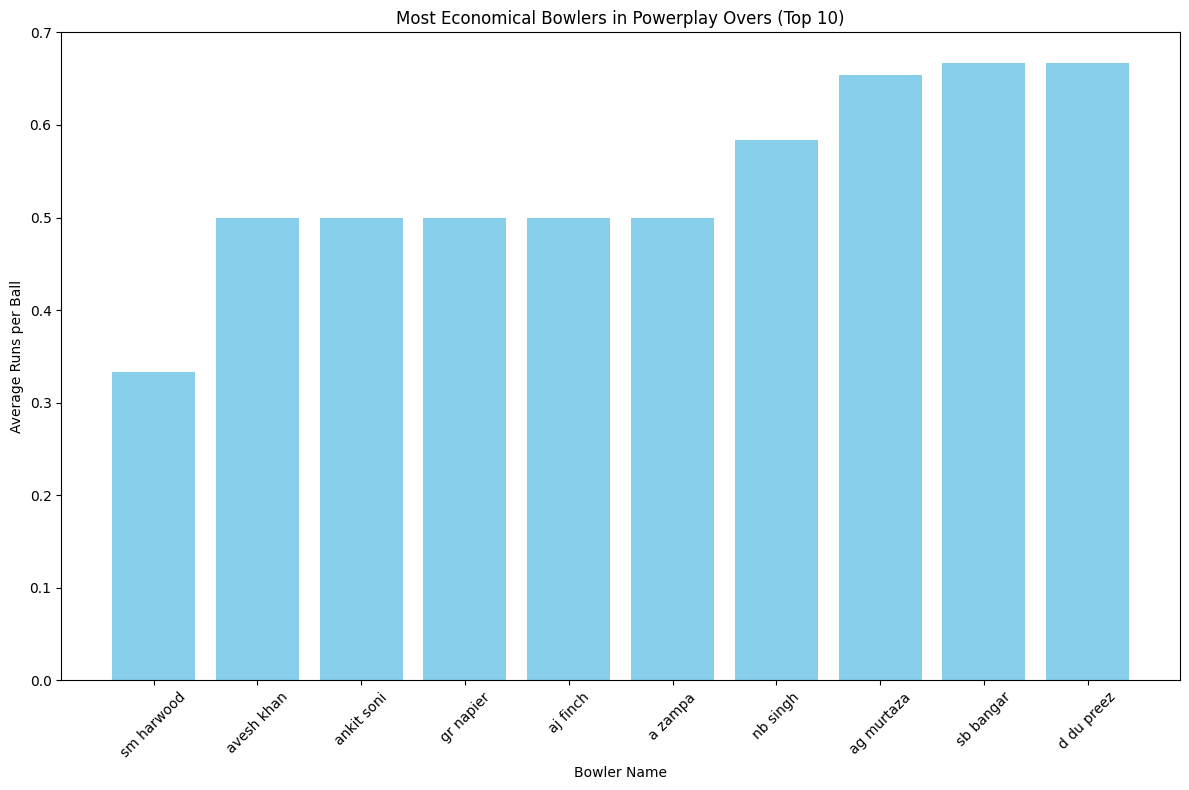

In [0]:
import matplotlib.pyplot as plt
     

# Assuming 'economical_bowlers_powerplay' is already executed and available as a Spark DataFrame
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))
# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

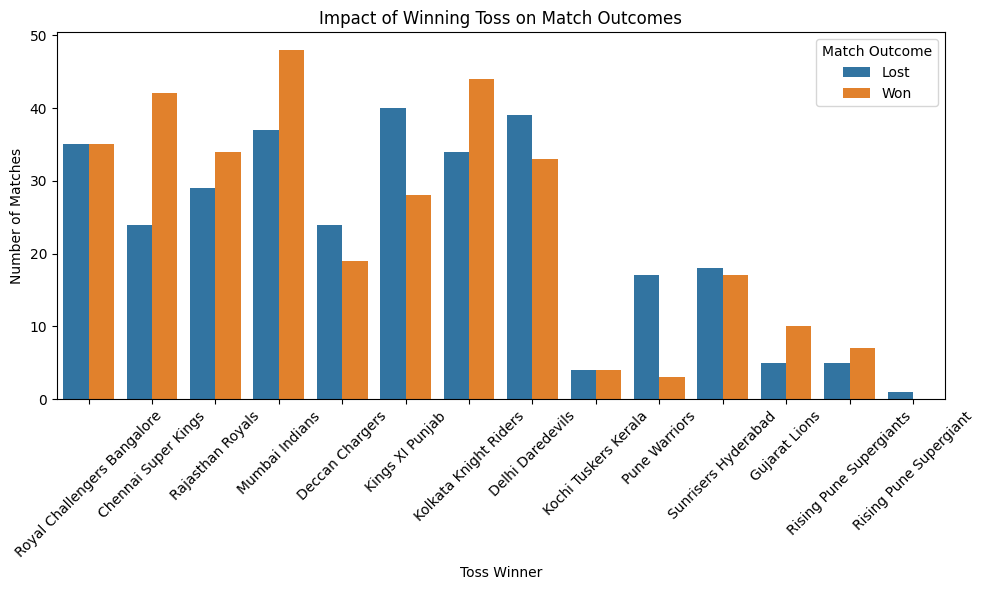

In [0]:
import seaborn as sns
     

toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

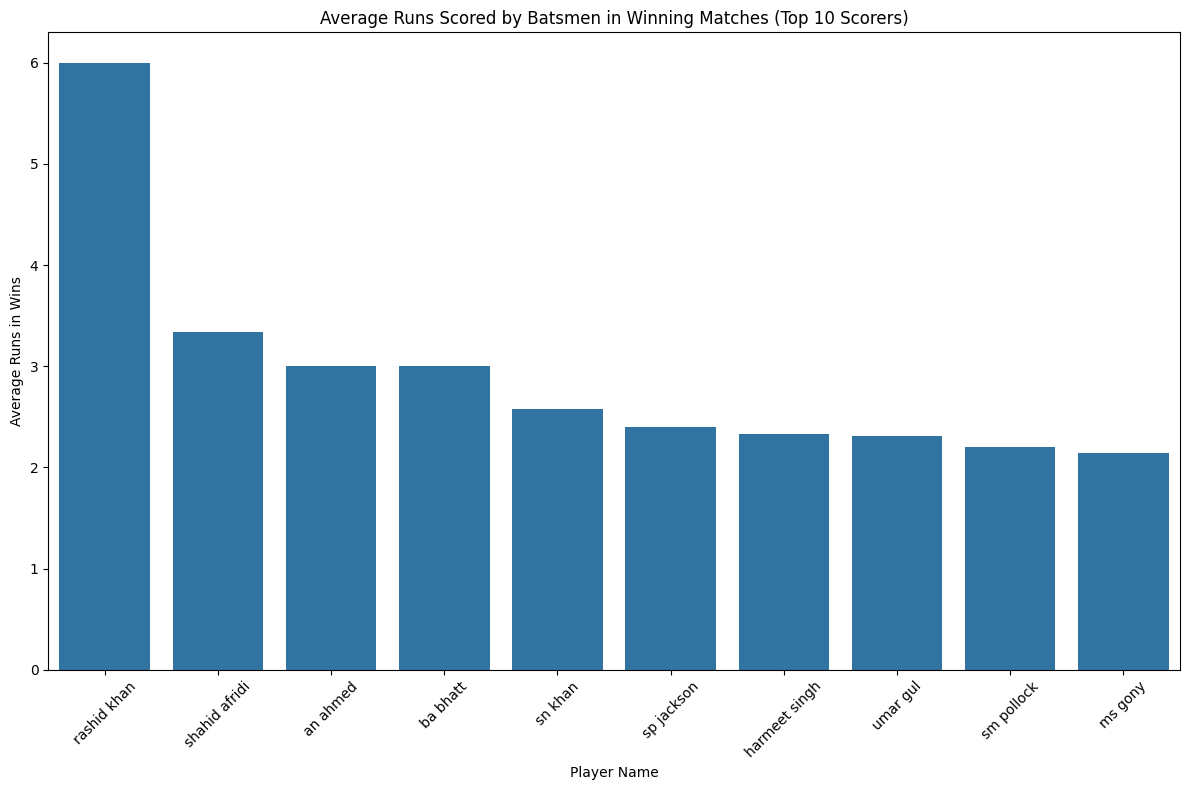

In [0]:

average_runs_pd = average_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/home/spark-2c97a8f2-f11f-4f7b-b2a4-8d/.ipykernel/2575/command-5198601124545769-1870335532:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd, palette='pastel')


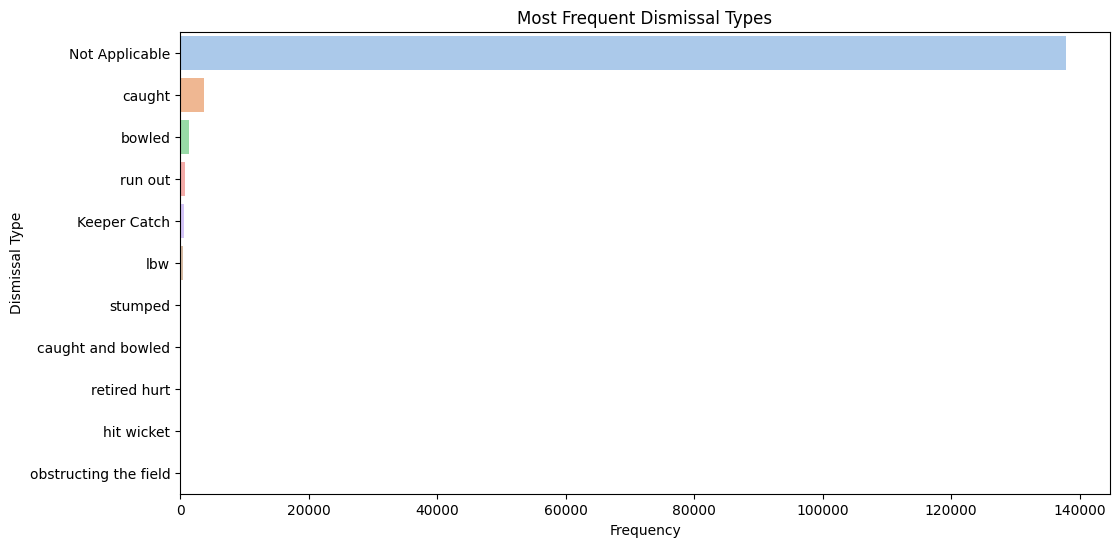

In [0]:

# Execute SQL Query
dismissal_types = spark.sql("""
SELECT out_type, COUNT(*) AS frequency
FROM ball_by_ball
WHERE out_type IS NOT NULL
GROUP BY out_type
ORDER BY frequency DESC
""")

     


# Convert to Pandas DataFrame
dismissal_types_pd = dismissal_types.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd, palette='pastel')
plt.title('Most Frequent Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()